In [14]:
# System imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
import panel as pn
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
from panel import widgets
from string import digits
import csv
import json
import numpy as np
import dateparser
import panel as pn

pn.extension()

%matplotlib inline

In [15]:
# Local imports
import sys
sys.path.append("../lib2")

from Constants import Constants
from ProcessingTools import DateProcessingTools
from MCForecastTools_Generic import MCSimulation_Generic


In [16]:
# Construct the tools
debug_level = 0
constants = Constants()
tool_data_processing = DateProcessingTools(debug_level)


In [17]:
# Import all preprocessed data
atlas           = pd.read_pickle(constants.PREPROCESSED_ATLAS_FILE_PATH)
forecast        = pd.read_pickle(constants.PREPROCESSED_FORECAST_DATA_FILE_PATH)
revenue2020     = pd.read_pickle(constants.PREPROCESSED_REVENUE2020_FILE_PATH)
revenue2020A    = pd.read_pickle(constants.PREPROCESSED_REVENUE2020A_FILE_PATH)
atlas2          = pd.read_pickle(constants.PREPROCESSED_ATLAS_2_FILE_PATH)


In [18]:
historical_data = atlas2.reset_index().set_index("Service Start").sort_index(ascending=True)

historical_data_invoice_amount = historical_data.groupby("Service Start").sum()["Invoice Amount"]
historical_data_invoice_count = historical_data.groupby("Service Start").count()["Invoice Amount"]

# Critical
historical_data_invoice_amount_cumulative = historical_data_invoice_amount.cumsum()
historical_data_invoice_count_cumulative = historical_data_invoice_count.cumsum()

# Extra
historical_data_invoice_mean = historical_data.groupby("Service Start").mean()["Invoice Amount"]
historical_data_nbr_users = historical_data.groupby("Service Start").sum()["Number of Users"]
historical_data_nbr_customers = historical_data.groupby("Service Start").count()["Customers"]

historical_data_nbr_users_cumulative = historical_data_nbr_users.cumsum()
historical_data_nbr_customers_cumulative = historical_data_nbr_customers.cumsum()


In [19]:
mc = MCSimulation_Generic(
    value_title="Invoice Amount",
    value_list = historical_data_invoice_amount_cumulative,
    num_simulation=1000,
    num_trailing_points = 10,
    scale_results=True,
    allow_negative_returns = True
)

mc.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0          1          2          3          4          5    \
0     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
1     1.138889   1.138889   1.138889   1.138889   1.138889   1.138889   
2     1.187500   1.187500   1.187500   1.187500   1.187500   1.187500   
3     1.801389   1.801389   1.801389   1.801389   1.801389   1.801389   
4     1.848611   1.848611   1.848611   1.848611   1.848611   1.848611   
..         ...        ...        ...        ...        ...        ...   
272  36.641785  25.236597  25.395900  42.285462  31.626303  31.031469   
273  38.085981  25.592734  25.069952  41.419899  30.697824  32.173622   
274  38.708602  25.150532  25.605008  40.234596  32.132718  34.348288   
275  40.104360  26.390606  26.873761  41.599858  30.571451  32.967480   
276  39.581144  27.869346  27.114204  41.572465  31.008033  34.082742   

           6          7          8          9    ...        990        991  \
0     1.000000   1.000000   1.000000   1.000000  ...   1.000000   1.000000   
1     1.138889   1.138889   1.138889   1.138889  ...   1.138889   1.138889   
2     1.187500   1.187500   1.187500   1.187500  ...   1.187500   1.187500   
3     1.801389   1.801389   1.801389   1.801389  ...   1.801389   1.801389   
4     1.848611   1.848611   1.848611   1.848611  ...   1.848611   1.848611   
..         ...        ...        ...        ...  ...        ...        ...   
272  35.203084  40.710414  35.816776  35.226740  ...  31.464681  32.073688   
273  33.586894  40.074546  33.994818  36.166337  ...  33.884249  33.271147   
274  34.420439  42.955535  34.982152  38.143299  ...  33.519191  33.936995   
275  35.686265  40.898801  36.003571  38.391641  ...  33.803004  34.209128   
276  36.982672  44.779264  32.219705  38.183475  ...  32.012758  34.280387   

           992        993        994        995        996        997  \
0     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
1     1.138889   1.138889   1.138889   1.138889   1.138889   1.138889   
2     1.187500   1.187500   1.187500   1.187500   1.187500   1.187500   
3     1.801389   1.801389   1.801389   1.801389   1.801389   1.801389   
4     1.848611   1.848611   1.848611   1.848611   1.848611   1.848611   
..         ...        ...        ...        ...        ...        ...   
272  31.211015  35.226462  35.834266  35.100898  38.863872  39.621526   
273  29.035948  31.740393  35.063258  34.453068  40.852744  38.737383   
274  30.331456  31.933019  36.719429  34.198797  40.234836  39.005668   
275  28.416034  34.218480  36.591437  35.207012  41.016178  41.756400   
276  28.407747  33.437971  38.372411  35.408963  41.555760  43.497908   

           998        999  
0     1.000000   1.000000  
1     1.138889   1.138889  
2     1.187500   1.187500  
3     1.801389   1.801389  
4     1.848611   1.848611  
..         ...        ...  
272  29.475304  34.912796  
273  30.491439  35.954356  
274  30.587932  38.195899  
275  29.871245  37.457860  
276  31.080388  37.900253  

[277 rows x 1000 columns]

In [20]:
mc.plot_simulation()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

<AxesSubplot:ylabel='Frequency'>

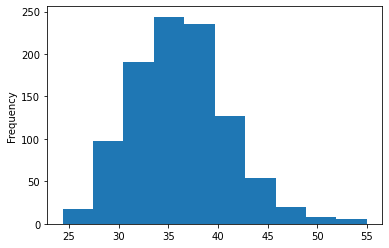

In [8]:
# mc.plot_distribution()
mc.simulated_return.iloc[-1, :]
mc.simulated_return.iloc[-1, :].plot(kind='hist', title="")
# mc.simulated_return.iloc[-1, :].plot(kind='hist', bins=10, density=True, title="", height=500, width=800)


In [9]:
mc.summarize_cumulative_return()

count           1.000000e+03
mean            2.606035e+06
std             3.495144e+05
min             1.752320e+06
25%             2.356750e+06
50%             2.578502e+06
75%             2.827228e+06
max             3.960038e+06
95% CI Lower    2.785020e+01
95% CI Upper    4.683355e+01
Name: 276, dtype: float64

In [10]:
historical_data_invoice_amount_cumulative.hvplot.line()

:Curve   [Service Start]   (Invoice Amount)

In [11]:
historical_data_invoice_count_cumulative.hvplot.line()

:Curve   [Service Start]   (Invoice Amount)

In [12]:
historical_data_nbr_users_cumulative.hvplot.line()

:Curve   [Service Start]   (Number of Users)

In [13]:
historical_data_nbr_customers_cumulative.hvplot.line()

:Curve   [Service Start]   (Customers)